## Introduction

Emotion is an affective phenomena that occurs in response to internal or external stimuli. In this sense, emotions predispose individuals to different behavior in accordance with these stimuli [1]. Emotion has also been shown to be one of the many key modulators of perception [2]. The sheer amount of psycho-physiological processes that emotions influence cannot be understated. These processes in turn give shape to perception. Thus, an understanding of emotion plays an important role in our understanding of the human experience.

However, there is a great challenge in understanding emotion: categorizing and quantifying the broad range of human emotion remains difficult since the identification and expression of emotion varies from person to person. One solution is to structure and define an emotion along key characteristics. Russell and Barrett propose the valence-arousal scale wherein an emotion is plotted on a 2D graph. The horizontal axis of such graph denotes *valence* which describes the level of pleasantness of an emotion. The vertical axis denotes *arousal* which describes the level of activity of an emotion [3].

Although Russell and Barrett's model serves to describe two fundamental characteristics of emotion, it can be expanded with a third dimension to more accurately account for the variability of emotion. This third dimension is *dominance* and describes the level of empowerment of an emotion. This characteristic of emotion is the subject of our focus for this analysis.

Dominance expands upon Russell and Barrett's model insofar as it distinguishes between emotions that would otherwise be characteristically identical. For example, dominance can distinguish between fear and anger. In the standard valence-arousal model, fear and anger can be described as having high valence and high arousal with little to no difference otherwise. However, these two emotions differ in their dominance, where anger is typically an empowering emotion and fear is a disempowering emotion.

There is an important distinction to be made: In this 3D model, dominance does not describe an individual's capacity to control or regulate their emotions. Rather, dominance is a measure of how "in-control" a person feels at a given moment.

A notable application of this dimensional approach to emotion is with regard to health. Emotional dysregulation has the capacity to negatively interfere with daily living. Failure to identify and manage emotions may produce adverse health effects in the long run. Emotion regulation is the mechanism by which an individual may maintain their emotional health. In addition to cognitive and behavioral interventions, music has been shown to be a prevalent resource for emotion regulation [4].

Since it is the characteristic that measures the level of empowerment, this body of work aims to observe the dominance ratings of songs used in the DEAP. We aim to determine the musical elements most responsible for improving an individual's empowerment and emotional regulation. We also aim to understand the physiological changes that arise from songs with varying dominance scsores.

## **Part I:** Self-Assessment Data

The Database for Emotion Analysis using Physiological Signals (DEAP) is a database that contains information on the physiological and psychological changes that occur when an individual is exposed to audio-visual stimuli. The DEAP was constructed by taking a group of 32 participants aged between 19 and 37 and exposing them to 40 one-minute clips of music videos across different genres. Participants gave their subjective ratings of each music video and had their peripheral physiological signals recorded. [5]

Our first step is to examine the dominance scores given by each participant's self-assessment for each music video.

### **Libraries**

In [1]:
# Pandas
import pandas as pd
# Matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_interactions import interactive_plot
# MNE-Python
import mne
from mne.preprocessing import ICA, create_ecg_epochs, create_eog_epochs
# Pickle
import pickle
# NumPy
import numpy as np
# Seaborn
import seaborn as sns
# DataScience
from datascience import *
# Chardet
import chardet
# Plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'colab'
# SciPy
from scipy.stats import linregress
# Librosa
import librosa.display
import librosa
# Soundfile
import soundfile as sf
# Python
import os
from random import randint, random, seed
%matplotlib inline

### **Examination of Dominance Scores**

#### Average Dominance Score by Track

Load the data provided by the DEAP into the notebook.

In [2]:
# Load up files
participant_ratings_path = "data/metadata/participant_ratings.csv"
video_list_path = "data/metadata/video_list.csv"

# Prints True if both files have been loaded up successfully
try:
    pr = pd.read_csv(participant_ratings_path, encoding='latin1')
    vl = pd.read_csv(video_list_path, encoding='latin1')
    pr_loaded = True
    vl_loaded = True
except Exception as e:
    pr_loaded = False
    vl_loaded = False
    error_message = str(e)

pr_loaded, vl_loaded

(True, True)

For the sake of this analysis, we will be omitting all videos that do not have a value in the `Experiment_id` column. A missing experiment ID makes it incredibly difficult to cross-examine peripheral signals later in our analysis.

In [3]:
video_df = vl.dropna(subset=['Experiment_id'])

To get a cursory examination into the dominance scores for each song, the code cell below creates a bar chart that visualizes the average dominance in descending order.

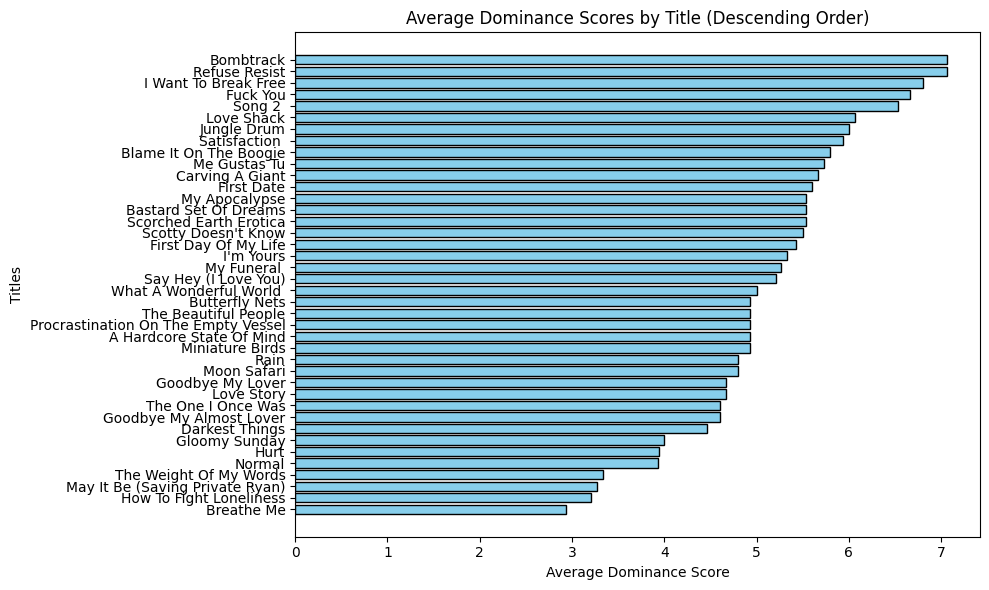

In [4]:
# Sort the DataFrame by AVG_Dominance in descending order
df_sorted = video_df.sort_values(by='AVG_Dominance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Title'], df_sorted['AVG_Dominance'], color='skyblue')
plt.xlabel('Average Dominance Score')
plt.ylabel('Titles')
plt.title('Average Dominance Scores by Title (Descending Order)')
plt.gca().invert_yaxis()  # Invert y-axis
plt.tight_layout()  # Adjust layout
plt.show()

The track Bombtrack by Rage Against the Machine appears to have the highest average dominance score.

#### Detailed Breakdown of Dominance, Arousal, and Valence

We suspect that there is a link between the reported scores for dominance and valence.

For the sake of investigation, the code cell below organizes the songs by their dominance and valence in descending order.

In [5]:
# Remove rows where all values are NaN in-place
vl.dropna(how='all', inplace=True)
videos = vl[~(vl['Experiment_id'].isna())].sort_values(by='Experiment_id')

# Dominance, Valence, and Arousal sorted by their average values for each video
dom = videos[['Artist', 'Title', 'AVG_Dominance', 'STD_Dominance']].sort_values(by='AVG_Dominance', ascending=False)
val = videos[['Artist', 'Title', 'AVG_Valence', 'STD_Valence']].sort_values(by='AVG_Valence', ascending=False)
aro = videos[['Artist', 'Title', 'AVG_Arousal', 'STD_Arousal']].sort_values(by='AVG_Arousal', ascending=False)

# Dominance Top 10 and Bottom 10
dom_top_bottom = pd.concat([dom.head(10), dom.tail(10)], axis=0)
dom_top_bottom.index = range(1, len(dom_top_bottom) + 1)

# Valence Top 10 and Bottom 10
val_top_bottom = pd.concat([val.head(10), val.tail(10)], axis=0)
val_top_bottom.index = range(1, len(val_top_bottom) + 1)

The tracks that contain the top 10 dominance and valence scores are displayed in tables below.

In [6]:
dom.head(10)

Artist                   Title  AVG_Dominance  \
117  Rage Against The Machine               Bombtrack         7.0667   
111                Sepultura            Refuse Resist         7.0667   
87                      Queen    I Want To Break Free         6.8000   
83                Lily Allen                 Fuck You         6.6667   
62                      Blur                  Song 2          6.5333   
61                 The B52'S               Love Shack         6.0667   
1            Emilíana Torrini             Jungle Drum         6.0000   
71             Benny Benassi            Satisfaction          5.9333   
14                  Jackson 5  Blame It On The Boogie         5.8000   
82                 Manu Chao             Me Gustas Tu         5.7333   

     STD_Dominance  
117         1.6111  
111         2.0806  
87          2.1664  
83          1.6193  
62          2.0613  
61          1.9821  
1           1.5584  
71          2.3228  
14          2.0067  
82          1.4817

In [7]:
val.head(10)

Artist                    Title  AVG_Valence  \
82                  Manu Chao              Me Gustas Tu       7.5333   
83                 Lily Allen                  Fuck You       7.2667   
62                       Blur                   Song 2        7.2000   
8   Michael Franti & Spearhead     Say Hey (I Love You)       7.1429   
79            Louis Armstrong   What A Wonderful World        7.1333   
26                  Jason Mraz                I'm Yours       7.0667   
87                       Queen     I Want To Break Free       7.0667   
61                  The B52'S                Love Shack       7.0000   
14                   Jackson 5   Blame It On The Boogie       6.9333   
1             Emilíana Torrini              Jungle Drum       6.8571   

    STD_Valence  
82       1.2579  
83       1.3400  
62       1.7588  
8        1.1867  
79       1.4079  
26       1.4360  
87       1.8427  
61       1.7127  
14       2.3228  
1        1.3015

In order to investigate the relationship between dominance and valence, this code block creates a scatterplot and plots a line of best fit.

In [8]:
# Extracting the columns for ease of use
x = dom['AVG_Dominance']
y = val['AVG_Valence']

# Calculating the correlation coefficient (r) and the coefficient of determination (r^2)
regression = linregress(x, y)
r = regression.rvalue
r_squared = r ** 2

# Creating a combined DataFrame for Plotly
combined_df = dom.copy()
combined_df['AVG_Valence'] = y

# Plotting the scatterplot with Plotly
fig = px.scatter(
    combined_df,
    x='AVG_Dominance',
    y='AVG_Valence',
    hover_data=['Artist', 'Title'],
    title=f'Scatterplot of AVG Dominance vs. AVG Valence with r: {r:.2f}, r²: {r_squared:.2f}',
    labels={
        'AVG_Dominance': 'AVG Dominance',
        'AVG_Valence': 'AVG Valence'
    }
)

# Adding a regression line
line_x = np.linspace(min(x), max(x), 100)
line_y = regression.intercept + regression.slope * line_x
fig.add_trace(
    go.Scatter(
        x=line_x,
        y=line_y,
        mode='lines',
        name='Regression Line'
    )
)

# Show the plot
fig.show()

There appears to be a positive correlation between the average dominance score of a song and its average valence score. This implies that the pleasantness of the emotion evoked by music is linked to its level of empowerment.

### **Frequency Analysis of Tracks**

#### Amplitude Graph

Due to copyright issues, we are unable to analyze the sound file of the track with the highest average dominance score, which was noted to be Bombtrack by Rage Against the Machine. Our next best alternative is to analyze the track I Want to Break Free by Queen, which contains a relatively high dominance score.

The code cell below organizes each available song into a pandas dataframe.

In [9]:
# Path to the audio files
pathway = "data/audio_files"

# List to store song metadata
data = []

# Iterate through all files in the directory
for filename in os.listdir(pathway):
    if filename.endswith(".wav"):  # Ensure we only process .wav files
        # Split the filename at the dash and strip spaces
        parts = filename.rsplit(' - ', 1)
        if len(parts) == 2:
            artist = parts[0].strip()
            title = parts[1].replace('.wav', '').strip()
            data.append({'Artist': artist, 'Title': title})

# Create a DataFrame from the collected metadata
downloaded_songs_df = pd.DataFrame(data)

# Construct the full path for each .wav file
downloaded_songs_df['.wav path'] = downloaded_songs_df.apply(
    lambda row: os.path.join(pathway, f"{row['Artist']} - {row['Title']}.wav"), axis=1
)

A waveform of the first 60 seconds of Queen's I Want To Break Free is plotted below. This is done to get a rough idea of the song's composition.

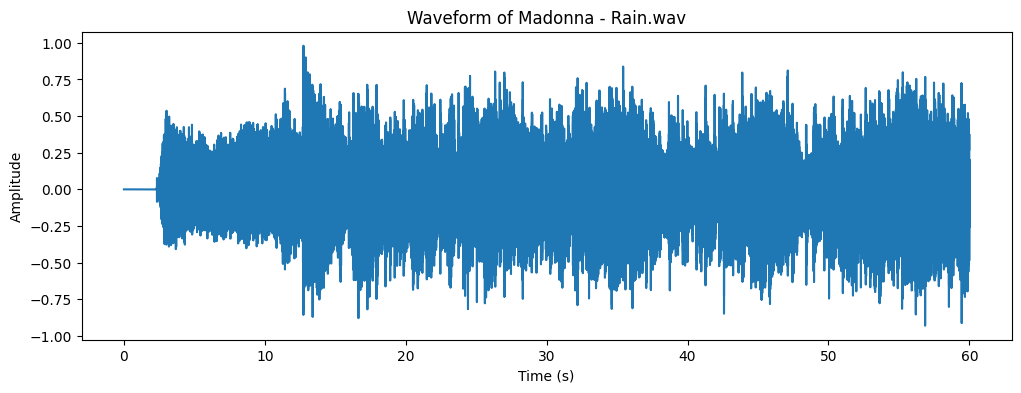

In [10]:
# Correct indexing dynamically based on DataFrame size
if not downloaded_songs_df.empty:
    # index for Queen - I Want to Break Free
    index = 1
    sample_song = downloaded_songs_df.iloc[index]['.wav path']  # Use column name for clarity

    # Check if the file exists
    if not os.path.exists(sample_song):
        print(f"File not found: {sample_song}")
    else:
        try:
            # Load the audio data
            x, sr = librosa.load(sample_song, sr=44100)

            # Calculate the number of samples corresponding to 60 seconds
            max_samples = int(60 * sr)

            # Truncate the waveform to the first 60 seconds
            x_sample = x[:max_samples]

            # Create a time axis for the waveform
            time = np.linspace(0, len(x_sample) / sr, len(x_sample), endpoint=False)

            # Create the pyplot plot
            plt.figure(figsize=(12, 4))  # Adjust figure size as needed
            plt.plot(time, x_sample)
            plt.title('Waveform of ' + os.path.basename(sample_song))
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.show()

        except sf.LibsndfileError as e:  # Handle specific audio loading errors
            print(f"Error loading audio file: {e}")
        except Exception as e:  # Catch all other exceptions
            print(f"An unexpected error occurred: {e}")
else:
    print("No .wav files found in the directory.")

The changes in the dymanics for this song are examined in terms of descriptive statistics given by this code cecll.

In [11]:
def describe(x):
    print('STD:', x.std())
    print('Min:', x.min())
    print('Max:', x.max())
    print('Range:', x.max() - x.min())
    print(f'IQR: [{round(np.quantile(x, 0.25), 3)}, {round(np.quantile(x, 0.75), 3)}]')

# Load the audio file
audio_path = 'data/audio_files/Queen - I Want To Break Free.wav'
y, sr = librosa.load(audio_path, sr=None)

# Compute the spectrogram (STFT or Mel spectrogram)
D = np.abs(librosa.stft(y))  # Compute the magnitude of the STFT

# Compute frequency bins corresponding to the spectrogram
frequencies = librosa.fft_frequencies(sr=sr)

# Frequency range of interest (60 Hz to 250 Hz)
freq_min = 60
freq_max = 250

# Find the indices of the frequencies in the desired range
freq_range_indices = np.where((frequencies >= freq_min) & (frequencies <= freq_max))[0]

# Extract the magnitude of the spectrogram in the desired frequency range
spectrogram_range = D[freq_range_indices, :]  # Select the frequency range

# Compute the energy (sum of squared magnitudes) in this frequency range
energy = np.sum(spectrogram_range**2, axis=0)  # Sum across frequency bins for each time frame

# Convert energy to dB scale for loudness (librosa.power_to_db expects power, so we use energy directly)
energy_db = librosa.power_to_db(energy, ref=np.max)

# Print the energy values (first few time frames)
print("Energy (in dB) of the audio:", energy_db)

# Describe the energy
describe(energy_db)

Energy (in dB) of the audio: [-80. -80. -80. ..., -80. -80. -80.]
STD: 16.6449
Min: -80.0
Max: 0.0
Range: 80.0
IQR: [-19.841, -12.013]


#### Spectrogram

Loudness is understood to be a fundamental element of music that is particularly effective at evoking emotion. A spectogram is constructed below to visualize the overall loudness of the track. The visualization also illustrates which frequency renges contain the most energy for the track.

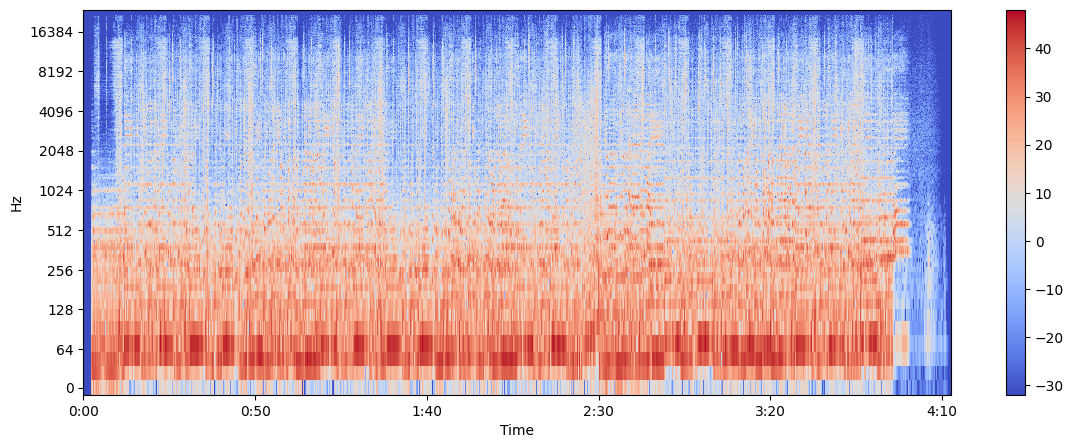

In [12]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

#### Chromagraph

A chromagraph is constructed below to display the changes in notes played over the duration of the entire track.

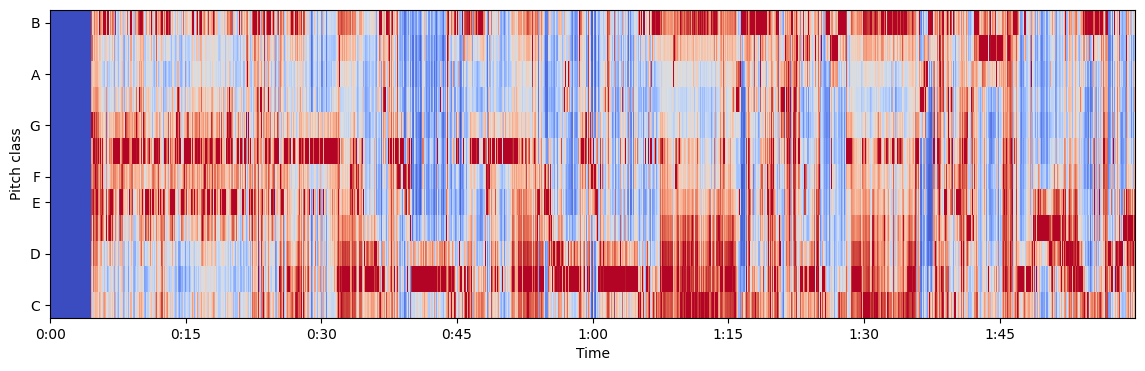

In [13]:
hop_length = 512

# Specify 'y' for the audio data
chromagram = librosa.feature.chroma_stft(y=x_sample, sr=sr, hop_length=hop_length)
plt.figure(figsize=(14, 4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

## **Part II:** Peripheral Data

### **Variability of Dominance**

Update video list to only 40 music videos that have a value for Experiment_id

In [14]:
vl = vl.dropna(subset=['Experiment_id'])

Print the title of the music video with the highest standard deviation for dominance.

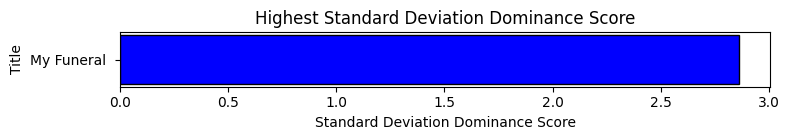

In [15]:
# Highest score
highest = vl.loc[vl['STD_Dominance'].idxmax()]

# New DataFrame
df_extremes = pd.DataFrame([highest])

# Plot
plt.figure(figsize=(8, 1.5))
plt.barh(df_extremes['Title'], df_extremes['STD_Dominance'], color=['blue'])
plt.xlabel('Standard Deviation Dominance Score')
plt.ylabel('Title')
plt.title('Highest Standard Deviation Dominance Score')
plt.tight_layout()
plt.show()

This song is of particular interest. The high standard deviation suggests that this song produced a lot of variability in the participants' level of empowerment.

Experiment_id for music video with the highest STD_Dominance is 39 ("My Funeral")

In [16]:
# Load the Excel file into a DataFrame
df = pd.read_csv(participant_ratings_path, encoding='latin1')

# Filter the DataFrame to keep rows where Experiment_id = 39 and drop other columns
experiment_39_df = df[df['Experiment_id'] == 39][['Participant_id', 'Experiment_id', 'Trial', 'Dominance']]

# Reset the index and drop the old one
experiment_39_df = experiment_39_df.reset_index(drop=True)

# Display head
experiment_39_df.head()

Participant_id  Experiment_id  Trial  Dominance
0               1             39      8       7.87
1               2             39     28       2.97
2               3             39     15       5.68
3               4             39      9       1.82
4               5             39     39       7.05

Here we create a scatterplot to show the spread of the dominance scores for the music video of "My Funeral". The aim is to observe the distance between the highest and lowest scores to better see how differently people felt about the music video.

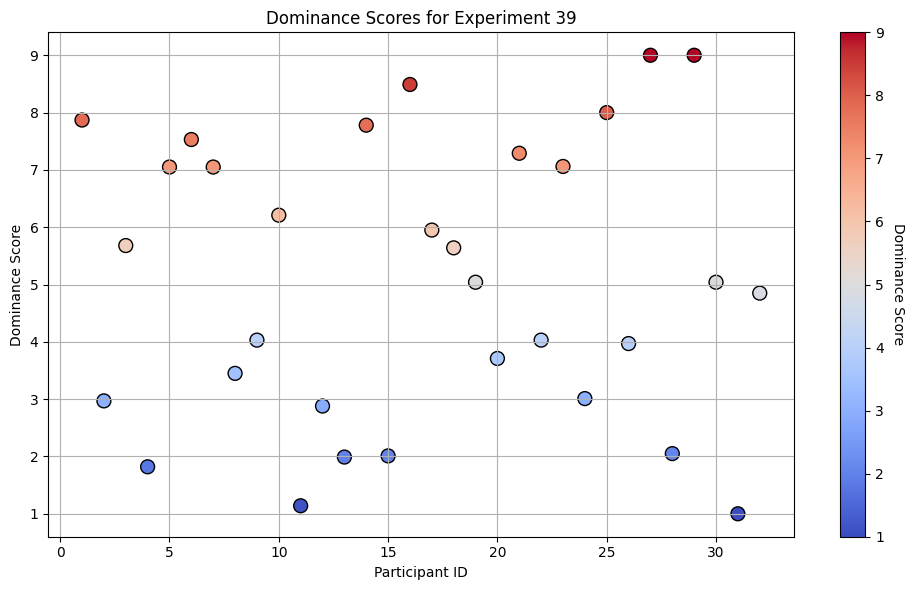

In [17]:
# Extract data from the DataFrame
participant_ids = experiment_39_df['Participant_id']
dominance_scores = experiment_39_df['Dominance']

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    participant_ids,
    dominance_scores,
    c=dominance_scores,
    cmap='coolwarm',
    s=100,
    edgecolor='k',
)

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Dominance Score', rotation=270, labelpad=15)

# Labels and title
plt.xlabel('Participant ID')
plt.ylabel('Dominance Score')
plt.title('Dominance Scores for Experiment 39')
plt.grid(True)
plt.tight_layout()
plt.show()

As you can see, we have scores as high as 9 and as low as 1. People seem to be experiencing strong empowerment or deep vulnerabitliy/weakness. I'm going to sort the participants in descending order according to their dominance scores and add labels to each depending on their score. 'High' if the score is > 7, 'Low' if the score is < 4, and 'Middle' for everything else.

In [18]:
# Sort the DataFrame and assign labels based on thresholds
sorted_experiment_39_df = experiment_39_df.sort_values(by='Dominance', ascending=False).reset_index(drop=True)
sorted_experiment_39_df['Dominance_Label'] = sorted_experiment_39_df['Dominance'].apply(
    lambda score: 'High' if score > 7 else 'Low' if score < 4 else 'Middle'
)

Print the sorted participant list from Experiment 39 to select from.

In [19]:
# Print the sorted DataFrame with labels
print("Sorted DataFrame with Dominance Labels:")
print(sorted_experiment_39_df)

Sorted DataFrame with Dominance Labels:
    Participant_id  Experiment_id  Trial  Dominance Dominance_Label
0               29             39      9       9.00            High
1               27             39     31       9.00            High
2               16             39     11       8.49            High
3               25             39     23       8.00            High
4                1             39      8       7.87            High
5               14             39     16       7.78            High
6                6             39     21       7.53            High
7               21             39      7       7.29            High
8               23             39     15       7.06            High
9                5             39     39       7.05            High
10               7             39     20       7.05            High
11              10             39     15       6.21          Middle
12              17             39      3       5.95          Middle
13      

### **Physiological Signals**

#### Physiological Signals for Music Video with Highest STD

##### Peripheral data

##### 1) 34 -> zEMG (*Zygomaticus Major EMG, zEMG1 & zEMG2, in microvolts 'µV'*): **measures muscle activity in cheek, related to smiling and joy**
##### 2) 35 -> tEMG (*Trapezius EMG, tEMG1 & tEMG2, in microvolts 'µV'*): **measures muscle activity in trapezius, related to stress or tension**
##### 3) 36 -> GSR (*values from Twente converted to Geneva format, in ohms 'Ω'*): **measures changes in skin conductance, related to sweat**
##### 4) 37 -> Respiration belt 'resp' (*in voltage/amplitude*): **detects breathing rate and depth**
##### 5) 38 -> Plethysmograph 'pleth' (*in voltage/amplitude*): **infers heart rate and pulse rhythm by measuring blood volume (pulse wave)**
##### 6) 39 -> Temperature 'temp' (*in unscaled celsius '℃'*): **detects changes in skin temperature, related to vasoconstriction or vasodilation**

In [20]:
labels = ['zEMG', 'tEMG', 'GSR', 'Resp', 'Pleth', 'Temp'] # Labels

There are 40 channels, 32 are EEG related, and 8 are peripheral. Of those 8, the first two are related to the movements of the eyes. I need a function that can retrieve the last 6 peripheral channels for any participant and for any trial number.There are 40 channels, 32 are EEG related, and 8 are peripheral. Of those 8, the first two are related to the movements of the eyes. I need a function that can retrieve the last 6 peripheral channels for any participant and for any trial number.

In [21]:
# Function to load peripheral data
def load_peripheral_data(participant_num, trial_num):
    """
    Returns:
    - np.ndarray: Peripheral data for the specified trial (6 channels, time series).
    """
    # Participant file name (e.g., 's01.dat')
    #file_name = f"data_preprocessed_python/s{participant_num:02d}.dat"
    file_name = f"data/data_preprocessed_python/s{participant_num:02d}.dat"

    try:
        # Load the participant data
        with open(file_name, 'rb') as file:
            subject = pickle.load(file, encoding='latin1')

        # Extract the specific trial's last 6 channels
        trial_data = subject['data'][trial_num, -6:, :]  # Select trial and last 6 channels
        return trial_data
    except FileNotFoundError:
        print(f"File {file_name} not found. Please check the file path.")
        return None
    except IndexError:
        print("Invalid trial number or participant number.")
        return None

The following code takes three participants from the sorted participants list and plots their peripheral data on top of each other in different colors with labels so we can easily study how their bodies' are reacting differently to the same stimuli and if it aligns with their subjective ratings of the music video.

In [47]:
def plot_chosen_participants(p1, p2, p3):
    # Time axis for 63 seconds at 128 Hz (63 * 128 = 8064 samples)
    time = np.linspace(0, 63, 8064)

    # Manually choose participants and put them in a list
    chosen_participants = [sorted_experiment_39_df.loc[p1], sorted_experiment_39_df.loc[p2], sorted_experiment_39_df.loc[p3]]

    # Empty list to store data for chosen participants
    three_sample_participants = []
    ordered_labels = []  # To track labels ('Low', 'Neutral', 'High')

    # Loop through chosen participants
    for row in chosen_participants:
        participant_num = int(row['Participant_id'])  # Participant ID
        trial_num = int(row['Trial']) - 1  # Convert trial number to zero-indexed
        dominance_score = int(row['Dominance'])  # Dominance score
        dominance_label = row['Dominance_Label']  # Dominance label ('High', 'Middle', 'Low')

        trial_data = load_peripheral_data(participant_num, trial_num)

        if trial_data is not None:
            three_sample_participants.append(trial_data)  # Append the trial data
            ordered_labels.append((dominance_label, participant_num, dominance_score))  # Append label, ID, and score
            print(f"{dominance_label}: Participant {participant_num}, Trial {trial_num + 1}, Dominance {dominance_score}")

    # Convert the list of arrays to a multi-dimensional NumPy array
    three_sample_participants_array = np.array(three_sample_participants)

    # Shape and label order
    print(f"Shape: {three_sample_participants_array.shape}")

    # Figure setup
    fig, axes = plt.subplots(6, 1, figsize=(12, 10), sharex=True)

    # Colors for each participant (adjusted for clarity)
    colors = ['red', 'green', 'blue']

    # Plot each channel for all chosen participants
    for i, ax in enumerate(axes):
        for p_idx, (dominance_label, participant_id, dominance_score) in enumerate(ordered_labels):
            ax.plot(
                time,
                three_sample_participants_array[p_idx, i, :],  # Select participant and channel
                label=f"{dominance_label} | ID:{participant_id} | Dom:{dominance_score}",
                color=colors[p_idx],
                alpha=0.7
            )
        ax.set_ylabel(labels[i])  # Set channel label
        ax.legend(loc='upper right')
        ax.grid(True)

    axes[-1].set_xlabel('Time (seconds)')
    plt.tight_layout()
    plt.show()

Manually select three participants from the list above and call _plot_chosen_participants(p1, p2, p3)_ to see their data.

High: Participant 29, Trial 9, Dominance 9
Middle: Participant 30, Trial 6, Dominance 5
Low: Participant 31, Trial 13, Dominance 1
Shape: (3, 6, 8064)


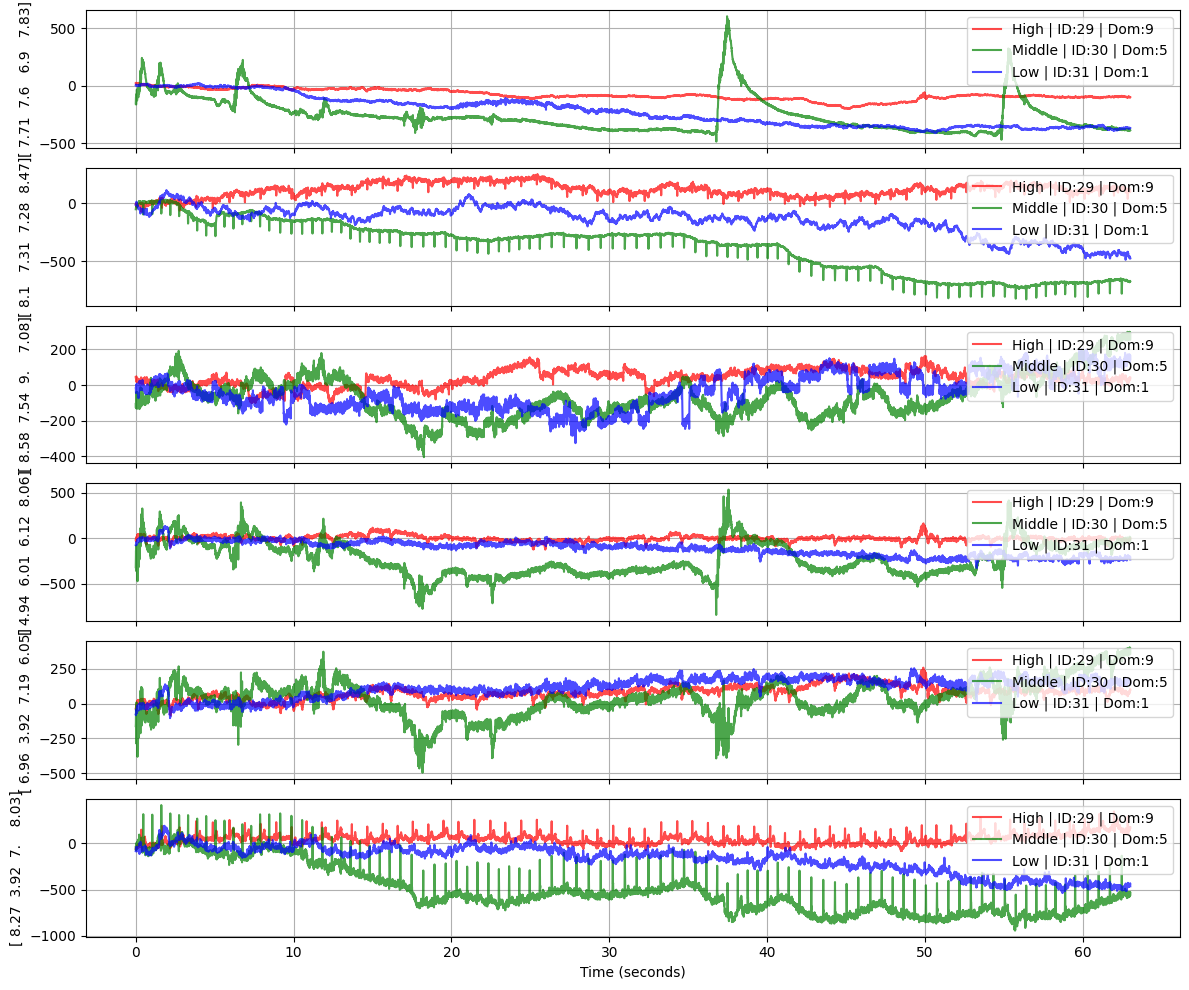

In [48]:
plot_chosen_participants(0, 15, 31)

#### Physiological Signals for Music Videos with Highest and Lowest Average Dominance Scores

Each participant was shown the music videos in a random order, so the first music video in the video list does not correspond to the first one shown. I must create a function that can retrieve the trial numbers for all participants watching a specific music video (using its Experiment_id) from the participant ratings list.

In [24]:
# Function to retrieve trial numbers for all participants for a specific music video
def load_trial_numbers(experiment_id):
    # Load the data
    file_path = participant_ratings_path
    df = pd.read_csv(file_path)

    # Filter rows where Experiment_id == experiment_id
    filtered_df = df[df['Experiment_id'] == experiment_id]

    # Extract Participant_id and Trial as dictionary pairs
    participants_trial_dict = dict(zip(filtered_df['Participant_id'], filtered_df['Trial']))

    return participants_trial_dict

##### Highest AVG_Dominace (Bombtrack)

Now, I will get the trial numbers for when the music video with the highest average dominance score. That is the video with the *Experiment_id = 10*

In [25]:
# Retrieve trial numbers for highest AVG_Dominance
highest_avg_dominance_trials = load_trial_numbers(10)

Here I get the peripheral data for all 32 participants pertaining to the music video with the highest average dominance score and put them in a single multi-dimensional NumPy array.

In [26]:
# Initialize a NumPy array
peripheral_data = np.zeros((32, 6, 8064)) # (32 participants, 6 channels, 8064 time points)

# Iterate through the dictionary
for participant, trial in highest_avg_dominance_trials.items():
    # Load the peripheral data for the given participant and trial
    data = load_peripheral_data(participant_num=participant, trial_num=trial - 1)
    # Store the data in the array
    if data is not None:
        # participant-1 because the participant IDs are 1-indexed, while NumPy arrays are 0-indexed
        peripheral_data[participant - 1] = data
# Sample
# print(peripheral_data[0, :, :3])
# print(peripheral_data.shape)

It's time to calculate the average waves of all 32 participants. NumPy has a function to do that, you just specify which dimension to do it upon.

In [27]:
# Average the data across all 32 participants (along axis 0)
avg_peripheral_data = np.mean(peripheral_data, axis=0)
# Sample
# print(avg_peripheral_data[:, :3])
# print(avg_peripheral_data.shape)

##### Lowest AVG_Dominace (Breathe Me)

Same procedures but for the lowest average dominance score. That is the video with the *Experiment_id = 28*

In [28]:
# Retrieve trial numbers for lowest AVG_Dominance
lowest_avg_dominance_trials = load_trial_numbers(28)

Build the single multi-dimensional NumPy array.

In [29]:
# Initialize a NumPy array
peripheral_data_low = np.zeros((32, 6, 8064))

# Iterate through the dictionary
for participant, trial in lowest_avg_dominance_trials.items():
    # Load the peripheral data for the given participant and trial
    data = load_peripheral_data(participant_num=participant, trial_num=trial - 1)
    # Store the data in the array
    if data is not None:
        # participant-1 because the participant IDs are 1-indexed, while NumPy arrays are 0-indexed
        peripheral_data_low[participant - 1] = data
# Sample
# print(peripheral_data_low[0, :, :3])
# print(peripheral_data_low.shape)

Calculate the average.

In [30]:
# Average the data across all 32 participants (along axis 0)
avg_peripheral_data_low = np.mean(peripheral_data_low, axis=0)

##### Comparison of the peripheral signals corresponding to the lowest and highest average dominance scores

To get a better idea of how people are physically reacting to videos with high and low dominance scores I want to take both high and low and put them in one large plot. I'm going to alternate between high and low so that it's easier to compare waves.

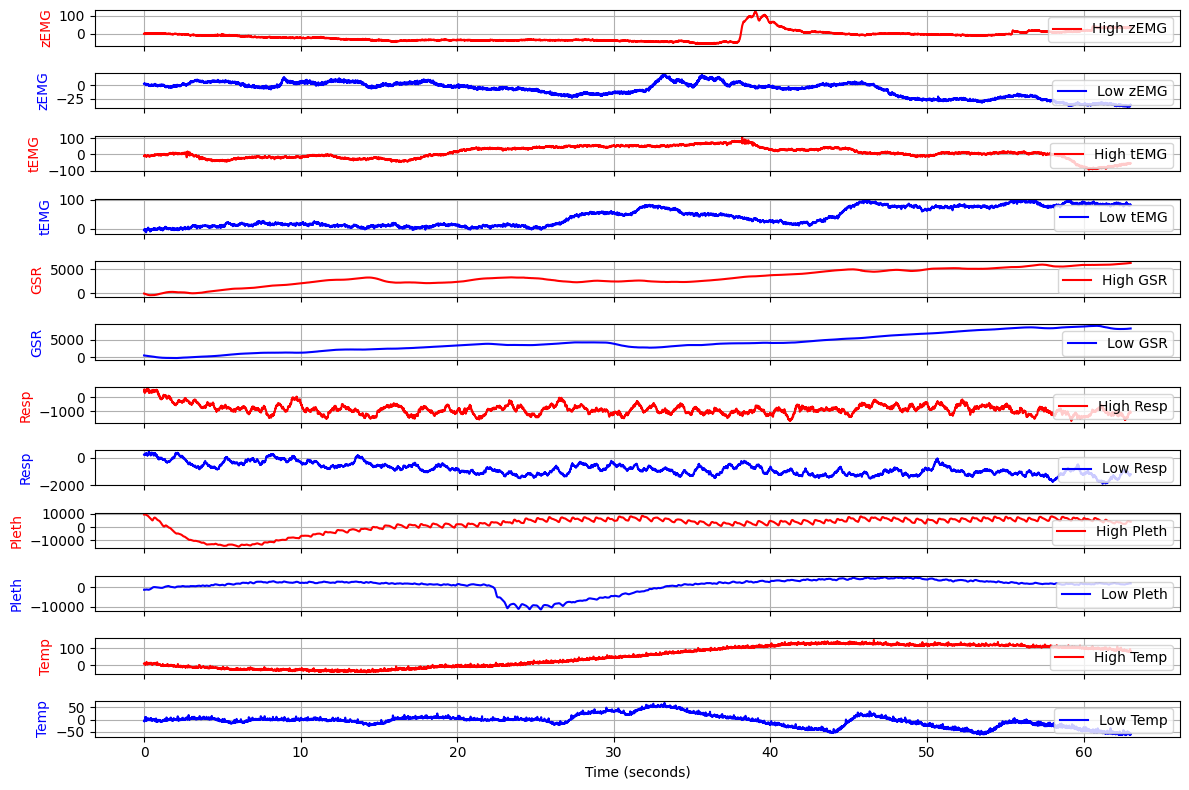

In [31]:
time = np.linspace(0, 63, 8064)  # Time axis
fig, axes = plt.subplots(12, 1, figsize=(12, 8), sharex=True)  # Subplots

# Plot each pair of high and low dominance channels
for i, ax in enumerate(axes):
    if i % 2 == 0:  # High dominance
        channel_idx = i // 2
        ax.plot(time, avg_peripheral_data[channel_idx], color='red', label=f"High {labels[channel_idx]}")
        ax.set_ylabel(labels[channel_idx], color='red')
        ax.legend(loc='upper right')
    else:  # Low dominance
        channel_idx = i // 2
        ax.plot(time, avg_peripheral_data_low[channel_idx], color='blue', label=f"Low {labels[channel_idx]}")
        ax.set_ylabel(labels[channel_idx], color='blue')
        ax.legend(loc='upper right')
    ax.grid(True)

axes[-1].set_xlabel('Time (seconds)')
plt.tight_layout()
plt.show()

Key observations:
- *zEMG*: High zEMG generally ranges between 0 and 100, while low zEMG dips as low as -25 and barely rises above 0. This suggests significantly more smiling with high-dominance videos and a more relaxed or frowning expression (which doesn’t activate the zygomaticus major) with low-dominance videos.
  
- *tEMG*: High tEMG fluctuates between -100 and 100 throughout the video, while low tEMG consistently rises from 0 to 100 as the video progresses. This indicates greater stress and muscle tension during low-dominance videos.

- *GSR*: Both high and low GSR show a gradual, consistent rise toward their maximum values. However, the ranges differ: high GSR peaks around 5000, whereas low GSR reaches higher levels, approximately 7000. This suggests that participants sweat more during low-dominance videos.

- *Resp*: High Resp ranges from 0 to -1500 (assuming 0 corresponds to full chest expansion/deep inhalation), while low Resp ranges from 0 to -2000. This indicates that participants watching high-dominance videos took deeper breaths, whereas those watching low-dominance videos took shallower breaths. While the frequency of breaths seems similar, further analysis could provide more details.

- *Pleth*: Except for occasional dips (e.g., at the beginning of the high Pleth signal and the middle of the low Pleth signal), high Pleth remains steady between 0 and 10000, while low Pleth stays within a range of 0 to 5000. This suggests an elevated pulse during high-dominance videos.

- *Temp*: High Temp consistently rises from 0 to just over 100, while low Temp fluctuates between -50 and 50. This implies that high-dominance videos are associated with a rise in body temperature, while low-dominance videos are not.

The way the body reacts to high and low dominance videos shows some clear differences. High-dominance videos tend to make people feel more empowered and active, with more smiling, deeper breaths, higher heart rates, and a noticeable rise in body temperature. On the other hand, low-dominance videos bring out tension, more sweating, shallower breaths, and a cooler body temperature, reflecting stress and vulnerability. These patterns show how dominance is related to physiological responses.

## **Part III:** EEG

### **EEG and ICA**

##### Import, load and explore data for first participant

According to the Queen Mary University of London (QMUL), the EEG data for the first 32 channels are preprocessed:
- Downsampled to 128 Hz
- EOG artifacts were removed
- A bandpass frequency filter from 4-45 Hz was applied
- Data was averaged to the common reference
- EEG channels reordered so that they all follow the Geneva order (recordings took place in Twente and Geneva)
- Segmented into 60 second trials and a 3 second pre-trial baseline removed
- Trials were reordered from presentation order to video (experiment_id) order

The peripheral (PER) data for the last 8 channels are preprocessed:
- The data was downsampled to 128Hz
- The data was segmented into 60 second trials and a 3 second pre-trial baseline removed
- Trials were reordered from presentation order to video (experiment_id) order

##### Note: the videos are in the order of Experiment_id, so not in the order of presentation. This means the first video is the same for each participant.

In [32]:
# Load and unpickle (from binary) data for first participant
with open('data/data_preprocessed_python/s'+ '01' + '.dat', 'rb') as file:
  subject = pickle.load(file, encoding='latin1')

In [33]:
# Show keys/catagories
subject.keys()

dict_keys(['labels', 'data'])

In [34]:
# Shape of 'data' and sample
print("EEG data shape:", subject['data'].shape)
print("Sample EEG data:", subject['data'][0][0])  # Shows the first trial's EEG data

EEG data shape: (40, 40, 8064)
Sample EEG data: [ 0.94823168  1.65333533  3.01372577 ..., -2.82648937 -4.47722969
 -3.67692812]


The shape (40, 40, 8064) corresponds to the following:
- 40: number of trials (1 for each video)
- 40: number of EEG/PER channels
- 8064: time (sample rate is at 128 Hz for 63 seconds)

In [35]:
# Shape of 'labels' and sample
print("Labels shape:", subject['labels'].shape)
print(subject['labels'][0]) # shows labels for the first video

Labels shape: (40, 4)
[ 7.71  7.6   6.9   7.83]


The shape (40, 4) corresponds to the following:
- 40: number of trials (1 for each video)
- 4: valence, arousal, dominance and liking scores

In [36]:
# Define both EEG and peripheral channel names in DEAP order
channel_names = [
    "Fp1", "AF3", "F3", "F7", "FC5", "FC1", "C3", "T7", "CP5", "CP1",
    "P3", "P7", "PO3", "O1", "Oz", "Pz", "Fp2", "AF4", "Fz", "F4",
    "F8", "FC6", "FC2", "Cz", "C4", "T8", "CP6", "CP2", "P4", "P8",
    "PO4", "O2", "hEOG", "vEOG", "zEMG", "tEMG", "GSR", "resp", 
    "pleth", "temp"
]

In [37]:
# Dictionary mapping channel index to name
channel_map = {index: name for index, name in enumerate(channel_names)}

# Access a specific channel by name in the first trial
channel_name = "temp"
channel_index = list(channel_map.keys())[list(channel_map.values()).index(channel_name)]

print(f"Data for {channel_name} in the first trial:")
print(subject['data'][0][channel_index])

Data for temp in the first trial:
[ 0.00639054  0.00639054  0.00639054 ..., -0.09760812 -0.09760812
 -0.09760812]


##### Channel information (40 channels):

##### 0 to 31 -> Fp1 to O2 (*in microvolts 'µV'*): **EEG signals (32 channels)**
##### 32 -> hEOG (*horizontal EOG, hEOG1 & hEOG2, in microvolts 'µV'*): **detects up and down eye movement + blinks**	
##### 33 -> vEOG (*vertical EOG, vEOG1 & vEOG2, in microvolts 'µV'*): **detects left and right eye movement + blinks**
##### 34 -> zEMG (*Zygomaticus Major EMG, zEMG1 & zEMG2, in microvolts 'µV'*): **measures muscle activity in cheek, related to smiling and joy**
##### 35 -> tEMG (*Trapezius EMG, tEMG1 & tEMG2, in microvolts 'µV'*): **measures muscle activity in trapezius, related to stress or tension**
##### 36 -> GSR (*values from Twente converted to Geneva format, in ohms 'Ω'*): **measures changes in skin conductance, related to sweat**
##### 37 -> Respiration belt 'resp' (*in voltage/amplitude*): **detects breathing rate and depth**
##### 38 -> Plethysmograph 'pleth' (*in voltage/amplitude*): **infers heart rate and pulse rhythm by measuring blood volume (pulse wave)**
##### 39 -> Temperature 'temp' (*in unscaled celsius '℃'*): **detects changes in skin temperature, related to vasoconstriction or vasodilation**

#### Plot all 40 valence, arousal and dominance scores for first participant

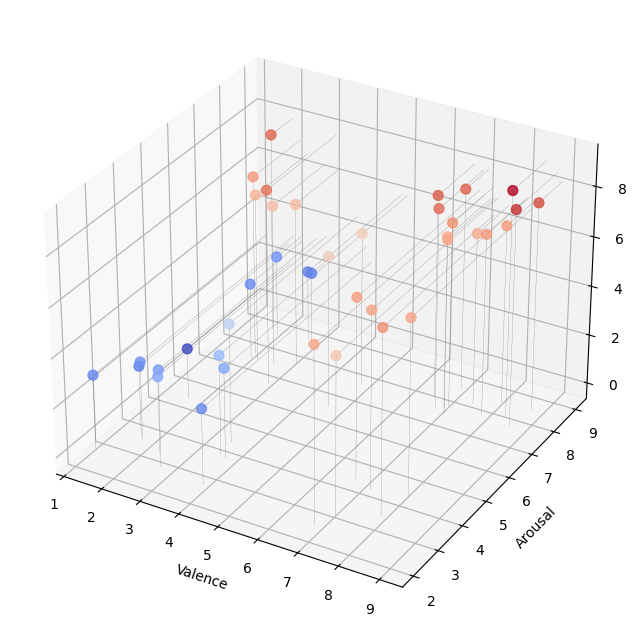

In [38]:
# Assuming 'subject' is your data dictionary and 'labels' contains the scores
labels = subject['labels']  # Shape is (40, 4)

# Extract Valence, Arousal, and Dominance
valence = labels[:, 0]  # X-axis
arousal = labels[:, 1]  # Y-axis
dominance = labels[:, 2]  # Z-axis

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D space, colored by Dominance and with larger dots
scatter = ax.scatter(valence, arousal, dominance, c=dominance, cmap='coolwarm', s=50, marker='o', alpha=0.8)

# Add shadow lines
for x, y, z in zip(valence, arousal, dominance):
    ax.plot([x, x], [y, y], [0, z], color='gray', linestyle='-', linewidth=0.2)  # Line to the floor
    ax.plot([x, x], [y, 9], [z, z], color='gray', linestyle='-', linewidth=0.2)  # Line to Valence-Dominance wall

# Label the axes
ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')

# Plot
plt.show();

#### More preprocessing for first participant's EEG data

##### Plotting EEG data and observing patterns

- Downsampled to 128 Hz
- EOG artifacts were removed
- A bandpass frequency filter from 4-45 Hz was applied
- Data was averaged to the common reference
- EEG channels reordered so that they all follow the Geneva order (recordings took place in Twente and Geneva)
- Segmented into 60 second trials and a 3 second pre-trial baseline removed
- Trials were reordered from presentation order to video (experiment_id) order

In [39]:
# Define channel names for EEG
eeg_channel_names = ["Fp1", "AF3", "F3", "F7", "FC5", "FC1", "C3", "T7", "CP5", "CP1",
                     "P3", "P7", "PO3", "O1", "Oz", "Pz", "Fp2", "AF4", "Fz", "F4",
                     "F8", "FC6", "FC2", "Cz", "C4", "T8", "CP6", "CP2", "P4", "P8",
                     "PO4", "O2"]

<img src="data/img/32-chans.png" width=300 />

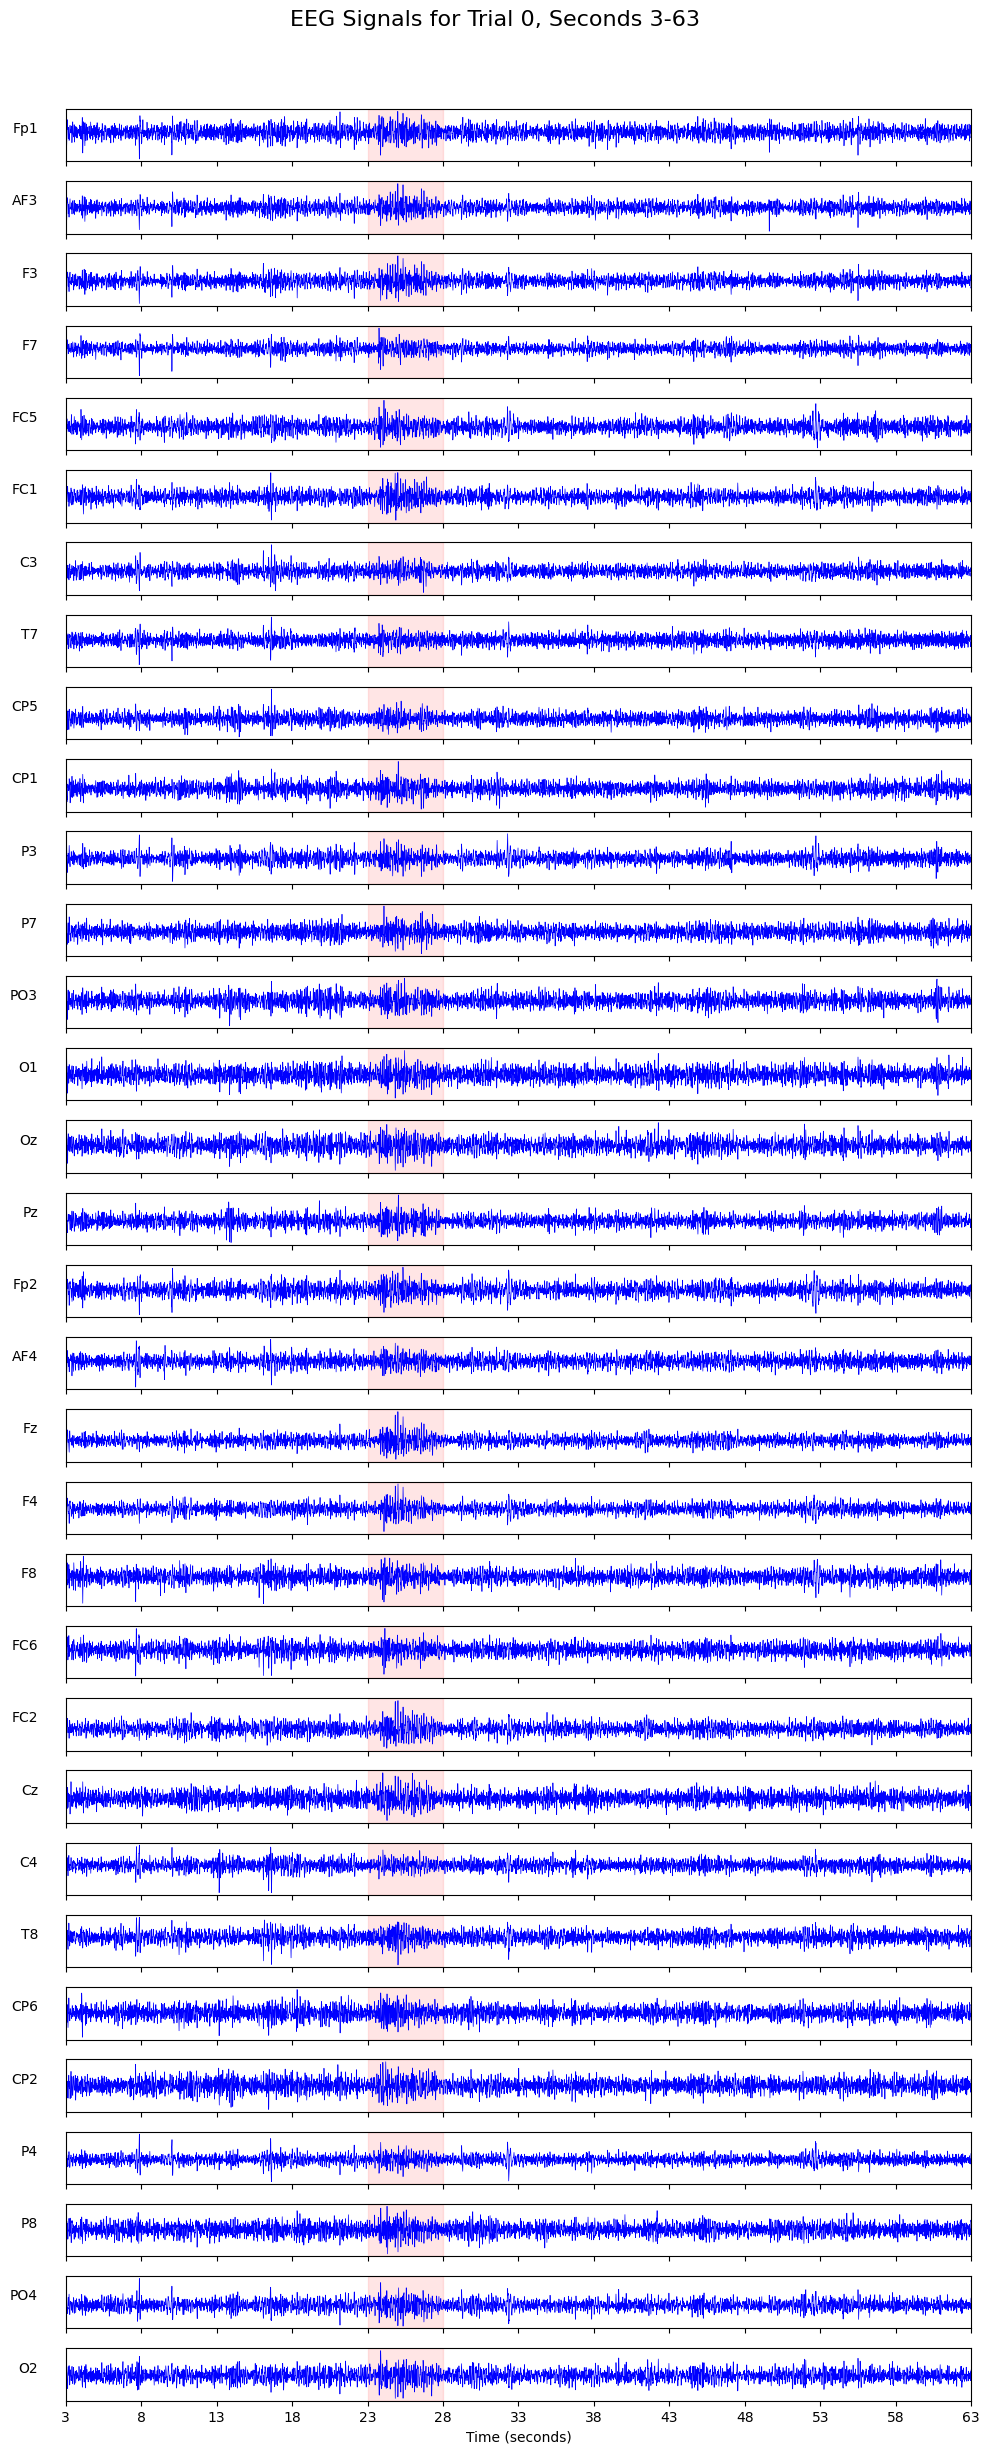

In [40]:
def plot_eeg_channels(subject_data, trial=0, start_second=3, duration=60, fs=128, highlight_range=(0, 0)):
    """
    - subject_data: EEG data for the participant in an array (channels x time).
    - trial: The specific trial to plot.
    - start_second: Starting second for the segment to plot.
    - duration: Number of seconds to display.
    - fs: Sampling rate (128 Hz for this data).
    """
    # Calculate start and end indices for the segment
    start_idx = start_second * fs
    end_idx = start_idx + duration * fs
    data_segment = subject_data[:32, start_idx:end_idx]

    # Generate time values in seconds
    time_values = np.arange(start_idx, end_idx) / fs  # Converting samples to seconds

    # Set up a vertical grid where each row is a separate channel
    fig, axes = plt.subplots(nrows=32, ncols=1, figsize=(10, 25), sharex=True)
    fig.suptitle(f'EEG Signals for Trial {trial}, Seconds {start_second}-{start_second + duration}', fontsize=16)

    # Plot each channel in its own row (axis)
    for i, ax in enumerate(axes):
        ax.plot(time_values, data_segment[i], color="blue", linewidth=0.5)
        ax.set_ylabel(eeg_channel_names[i], rotation=0, labelpad=20, fontsize=10, ha='right')
        ax.set_yticks([])  # Hide y-axis ticks for cleaner look
        ax.set_xlim(time_values[0], time_values[-1])  # Ensure all plots align to the same x-axis range

        # Highlight the specified range with a red background
        ax.axvspan(highlight_range[0], highlight_range[1], color="red", alpha=0.1)

    # Set x-axis ticks to every 5 seconds and label only on the last plot
    axes[-1].set_xticks(np.arange(time_values[0], time_values[-1] + 1, 5))  # Tick every 5 seconds
    axes[-1].set_xlabel('Time (seconds)')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for titles
    plt.show()

# Plot
plot_eeg_channels(subject_data=subject['data'][0], start_second=3, duration=60, highlight_range=(23, 28))

Here you can see there's an odd spike in pretty much all the electrodes which correspond to what the participant was viewing between seconds 20 and 25 (-3 seconds to remove baseline) of the music video. After further examination, this is about when a close up shot of lips appear on screen for the first time.

#### Independent Component Analysis (ICA)

Creating RawArray with float64 data, n_channels=32, n_times=8064
    Range : 0 ... 8063 =      0.000 ...    62.992 secs
Ready.


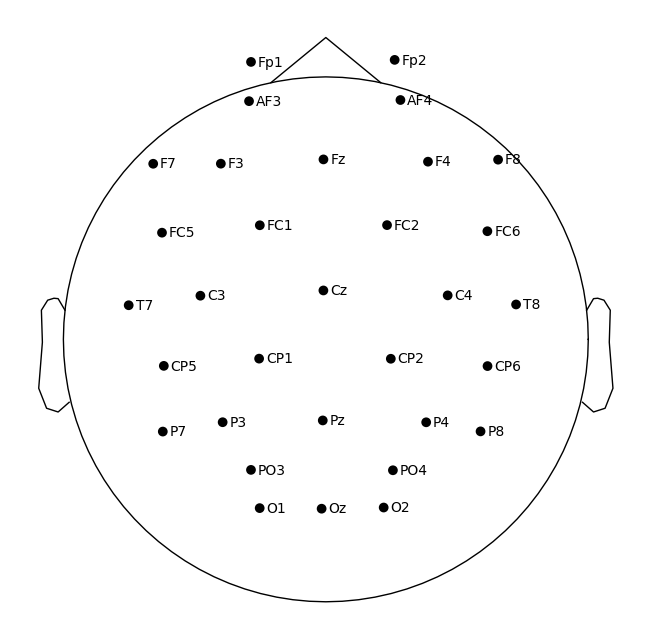

In [41]:
# Separate EEG
eeg_data = subject['data'][0][:32, :]  # First 32 channels for EEG

sfreq = 128  # Sampling frequency (Hz)

# Create MNE info object for EEG channels only
info_eeg = mne.create_info(ch_names=eeg_channel_names, sfreq=sfreq, ch_types="eeg")
raw_eeg = mne.io.RawArray(eeg_data, info_eeg)

# Apply the 10-20 montage to EEG data
montage = mne.channels.make_standard_montage('standard_1020')
raw_eeg.set_montage(montage)

# Plot sensor positions to visualize the EEG channel locations
raw_eeg.plot_sensors(show_names=True);

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 213 samples (1.664 s)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 20 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.4s.


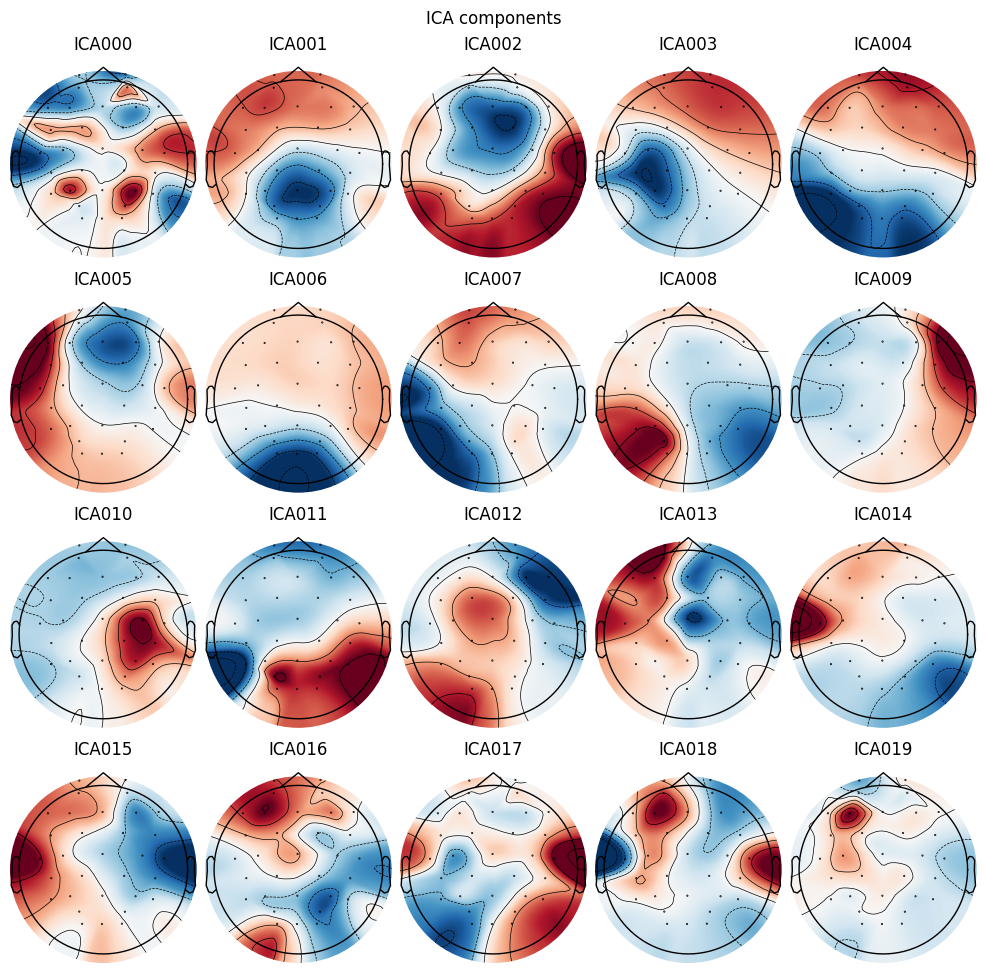

In [42]:
# Bandpass filter the EEG data to remove low and high frequencies
raw_eeg.filter(4., 45., fir_design='firwin')  # Bandpass filter from 4 to 45 Hz

# Initialize and fit ICA on the filtered EEG data
ica = ICA(n_components=20, method='fastica', random_state=42)
ica.fit(raw_eeg)

# Plot ICA components for visual inspection
ica.plot_components();

##### Eye Movement (EOG) Artifacts
- Common Signs: Large, low-frequency waves often localized in the frontal channels.
- Channels to Watch: Fp1, Fp2, AF3, AF4 (frontal channels).
- Component Characteristics:
    - Look for components with high amplitude in the frontal area.
    - Blinks appear as slow, high-amplitude deflections, often affecting both Fp1 and Fp2.
    - Horizontal eye movements can appear in lateral channels (F7 and F8).

##### Muscle (EMG) Artifacts
- Common Signs: High-frequency noise that might look spiky or dense.
- Channels to Watch: T7, T8, and other temporal channels, though muscle activity can show up in various locations.
- Component Characteristics:
    - Muscle artifacts (e.g., jaw clenching, scalp tension) show up as high-frequency bursts or patterns.
    - If you see a component with activity across a broad frequency range (often above 30 Hz), it’s likely an EMG artifact.

Excluded components: [2, 4, 5, 9, 13, 14, 15]
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 7 ICA components
    Projecting back using 32 PCA components


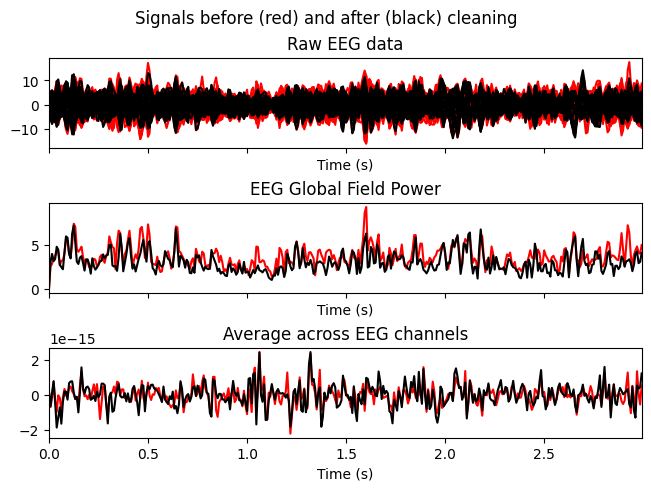

In [43]:
# Empty exclude list
ica.exclude = []

# Mark components for exclusion
ica.exclude.extend([2, # Occipital & EMG
                    4, # EOG
                    5, # EMG
                    9, # EMG
                    13, # EOG
                    14, # EMG
                    15]) # EMG

print("Excluded components:", ica.exclude)

# Visualize the overlay of the original data with the cleaned data after ICA removal
ica.plot_overlay(raw_eeg, exclude=ica.exclude);

In [44]:
# Apply ICA to remove marked components associated with artifacts
ica.apply(raw_eeg)

# Create a copy to retain both cleaned and unmodified EEG data
raw_cleaned = raw_eeg.copy()

ica.apply(raw_cleaned)  # Apply ICA

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 7 ICA components
    Projecting back using 32 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 7 ICA components
    Projecting back using 32 PCA components


<RawArray | 32 x 8064 (63.0 s), ~2.0 MiB, data loaded>

In [45]:
# Extract the cleaned EEG data from raw_cleaned
cleaned_eeg_data = raw_cleaned.get_data()

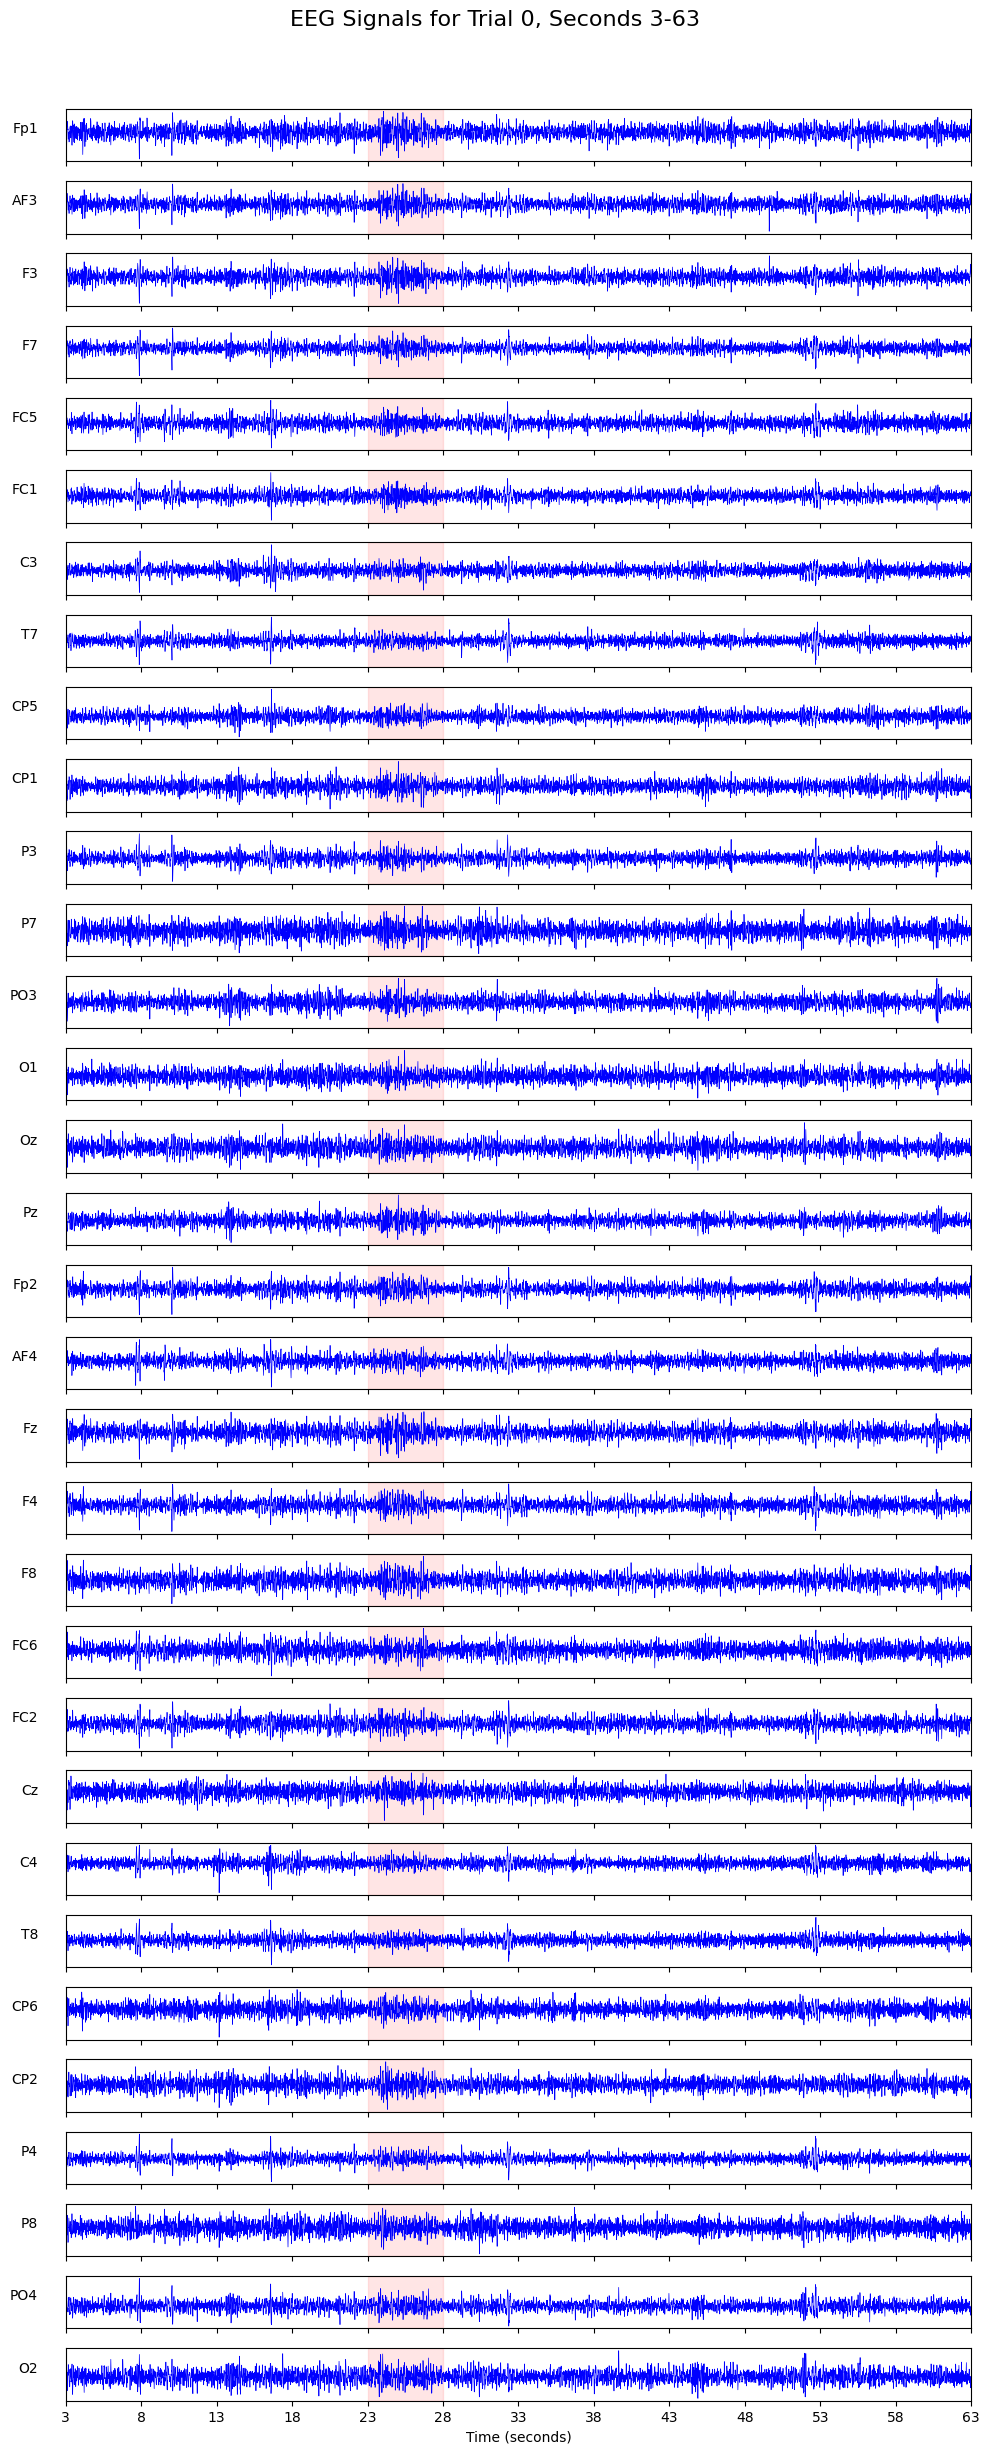

In [46]:
# Plot cleaned eeg data
plot_eeg_channels(subject_data=cleaned_eeg_data, start_second=3, duration=60, highlight_range=(23, 28))

It is clear after **Independent Component Analysis (ICA)** that the amplitude of some signals have increased. When certain components are removed, the reconstruction of the EEG data might emphasize other components that were not excluded. The part highlighted in red is a part that I was analyzing earlier, as we can see, it is not an artifact rather a stimulation of the first participant's brain in reaction to the music video.

It is also clear that the increase in amplitude and overall difference between the EEG data before and after **Independent Component Analysis (ICA)** is not that significant, this is probably because the data was already preprocessed and recorded in a controlled environment. It might not be needed to find patterns that are of interest to us in this project.

## Further Research

Our findings demonstrate the effectiveness of music as a means of evoking emotion. Some songs are noted to produce variable results among the DEAP participants. Songs like My Funeral by Dark Funeral elicited high dominance in some individuals and low dominance in others. However, there are a few songs that were generally reported to produce high levels of empowerment among the participants.


Future research would focus on designing an experiment that will directly measure the effectiveness of music with high dominance on emotional regulation.

The broad aim of this proposed study would be to improve the well-being of individuals who suffer from conditions that impair emotional regulation. In this study, the population of interest would be individuals that are known to suffer from anxiety and depression.

Under our Findings I, we have found the top 10 songs with the highest average dominance score given by participants in the DEAP. These songs would serve to guide our suearch for more music that may produce high dominance. This can be accomplished by identifying the elements of the songs from the DEAP that are shared among the top 10 with highest average dominance.

Furthermore, there is room for the use of magnetoencephelography (MEG) over electroenchephalography (EEG) in our study. MEG is noted to provide increased spatial resolution of brain activity, which would improve the quality of data for analysis.

## References

[1] Dub, R. (2017). Emotions. In B. P. McLaughlin (Ed.), Macmillan Interdisciplinary Handbooks. Philosophy: Mind (pp. 245-266). Macmillan Reference USA. https://link.gale.com/apps/doc/CX3642800024/GVRL?u=pasa19871&sid=bookmark-GVRL&xid=487efe62

[2] Stefanucci, J. K., Gagnon, K. T., & Lessard, D. A. (2011). Follow your heart: Emotion adaptively influences perception. Social and personality psychology compass, 5(6), 296–308. https://doi.org/10.1111/j.1751-9004.2011.00352.x

[3] Barrett, L. F. (2013). Emotion, Structural Approaches. In H. Pashler (Ed.), Encyclopedia of the Mind (Vol. 1, pp. 297-300). SAGE Reference. https://link.gale.com/apps/doc/CX3719800121/GVRL?u=pasa19871&sid=bookmark-GVRL&xid=1690f108

[4] Tan, M., Zhou, X., Shen, L., Li, Y., Chen, X., & Tamam, L. (2024). Music’s Dual Role in Emotion Regulation: Network Analysis of Music Use, Emotion Regulation Self‐Efficacy, Alexithymia, Anxiety, and Depression. Depression & Anxiety (1091-4269), 2024, 1–16. https://doi.org/10.1155/2024/1790168

[5] S. Koelstra, C. M\ uehl, M. Soleymani, J.-S. Lee, A. Yazdani, T. Ebrahimi, T. Pun, A. Nijholt, I. Patras (2012). DEAP: A Database for Emotion Analysis using Physiological Signals. EEE Transactions on Affective Computing, vol. 3, no. 1, pp. 18-31, 2012 https://www.eecs.qmul.ac.uk/mmv/datasets/deap/doc/tac_special_issue_2011.pdf
